# Inlämning XGBoost

Axel wieslander jansson

* Prepare the data, remove and convert any values that cannot be used by the model such as textdata
* Evaluate the model and analyze which attributes have the largest impact on the output
* Produce a confusion matrix and analyze which types of errors are made by the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

## Importing datasets

In [3]:
df_test = pd.read_csv('../../Datasets/churn_test.csv')
df_train = pd.read_csv('../../Datasets/churn_train.csv')

# Exploring datasets

In [4]:
df_test.shape

(1409, 21)

In [5]:
df_train.shape

(5634, 21)

In [6]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [7]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


In [8]:
df_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking datatypes

In [10]:
df_test.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Tenure info

In [12]:
print(f"Testdata. Max tenure: {df_test['tenure'].max()} min tenure: {df_test['tenure'].min()}")


Testdata. Max tenure: 72 min tenure: 0


In [13]:
print(df_test[df_test['tenure'] == 0])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
765   4075-WKNIU  Female              0     Yes        Yes       0   
910   5709-LVOEQ  Female              0     Yes        Yes       0   
1190  1371-DWPAZ  Female              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
765           Yes               Yes             DSL             No  ...   
910           Yes                No             DSL            Yes  ...   
1190           No  No phone service             DSL            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
765               Yes         Yes         Yes              No  Two year   
910               Yes          No         Yes             Yes  Two year   
1190              Yes         Yes         Yes              No  Two year   

     PaperlessBilling            PaymentMethod MonthlyCharges  TotalCharges  \
765                No             Mail

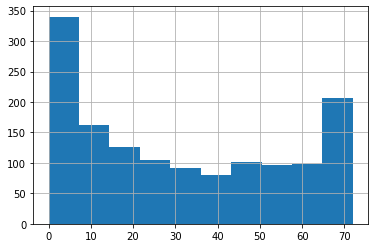

In [14]:
df_test['tenure'].hist();

In [15]:
print(f"Traindata. Max tenure: {df_train['tenure'].max()} min tenure: {df_train['tenure'].min()}")

Traindata. Max tenure: 72 min tenure: 0


In [16]:
print(df_train[df_train['tenure'] == 0])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1832  7644-OMVMY    Male              0     Yes        Yes       0   
2121  3115-CZMZD    Male              0      No        Yes       0   
2347  4472-LVYGI  Female              0     Yes        Yes       0   
2651  2520-SGTTA  Female              0     Yes        Yes       0   
2703  2923-ARZLG    Male              0     Yes        Yes       0   
3294  3213-VVOLG    Male              0     Yes        Yes       0   
3999  4367-NUYAO    Male              0     Yes        Yes       0   
5162  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
1832          Yes                No              No  No internet service  ...   
2121          Yes                No              No  No internet service  ...   
2347           No  No phone service             DSL                  Yes  ...   
2651          Yes                No          

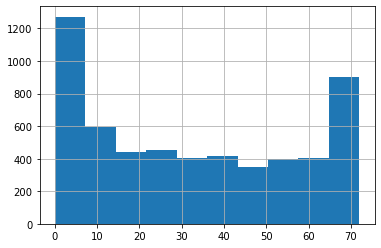

In [17]:
df_train['tenure'].hist();

### Montly charges

In [18]:
print(f"Testdata. Max monthly charges: {df_test['MonthlyCharges'].max()} min monthly charges: {df_test['MonthlyCharges'].min()}")

Testdata. Max monthly charges: 117.6 min monthly charges: 18.7


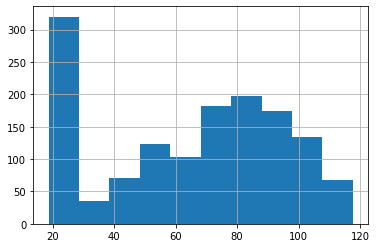

In [19]:
df_test['MonthlyCharges'].hist();

In [20]:
print(f"Traindata. Max monthly charges: {df_train['MonthlyCharges'].max()} min monthly charges: {df_train['MonthlyCharges'].min()}")

Traindata. Max monthly charges: 118.75 min monthly charges: 18.25


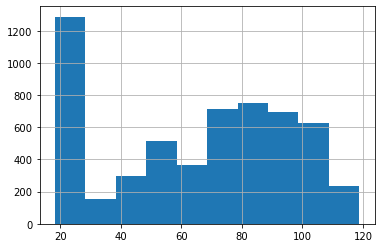

In [21]:
df_train['MonthlyCharges'].hist();

### TotalCharges

In [22]:
print(f"Testdata. Max total charges: {df_test['TotalCharges'].max()} min total charges: {df_test['TotalCharges'].min()}")

Testdata. Max total charges: 999.45 min total charges:  


There is missing data in the "TotalCharges" column. These values are changed to "-1" denoting missing value.

In [23]:
df_test[df_test['TotalCharges'] == df_test['TotalCharges'].min()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
765,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
910,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1190,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [24]:
missing_data_test = df_test[df_test['TotalCharges'] == df_test['TotalCharges'].min()].index

missing_data_test

Int64Index([765, 910, 1190], dtype='int64')

In [25]:
print(f"Traindata. Max total charges: {df_train['TotalCharges'].max()} min total charges: {df_train['TotalCharges'].min()}")

Traindata. Max total charges: 999.9 min total charges:  


In [26]:
df_train[df_train['TotalCharges'] == df_train['TotalCharges'].min()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1832,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
2121,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2347,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
2651,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2703,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3294,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3999,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
5162,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [27]:
missing_data_train = df_train[df_train['TotalCharges'] == df_train['TotalCharges'].min()].index

missing_data_train

Int64Index([1832, 2121, 2347, 2651, 2703, 3294, 3999, 5162], dtype='int64')

## Creating a modified copy of the original data

In [28]:
df_test_mod = df_test.copy()

for i in missing_data_test:    
    df_test_mod.loc[i,('TotalCharges')] = -1
df_test_mod.iloc[765]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                  -1
Churn                         No
Name: 765, dtype: object

In [29]:
df_train_mod = df_train.copy()

for i in missing_data_train:
    df_train_mod.loc[i,('TotalCharges')] = -1


# Splitting into output and input

In [30]:
X_test = df_test_mod.drop(columns=['Churn'])
y_test = df_test_mod['Churn']

X_train = df_train_mod.drop(columns=['Churn'])
y_train = df_train['Churn']

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_train_df = pd.DataFrame({'Churn': y_train})

y_test = le.fit_transform(y_test)
y_test_df = pd.DataFrame({'Churn': y_test})
y_test_df


,Churn
0,0
1,1
2,0
3,0
4,1
...,...
1404,0
1405,0
1406,1
1407,0


## Churn ratio 
For both the training and the testdata the churn ratio is about 26%. Since both the training and testdata have similar distribution of churn, the skewed values towards no churn is simply the reality of churn and it is not an issue.

Churn    0.263756
dtype: float64


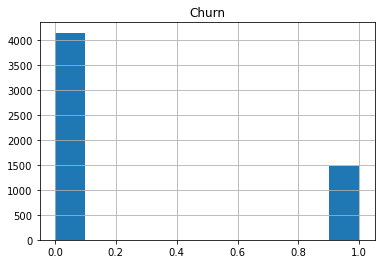

In [31]:
churn_ratio_train = ((y_train_df == 1).sum())/((y_train_df == 0).sum() + (y_train_df == 1).sum())
y_train_df.hist();
print(churn_ratio_train)

Churn    0.271824
dtype: float64


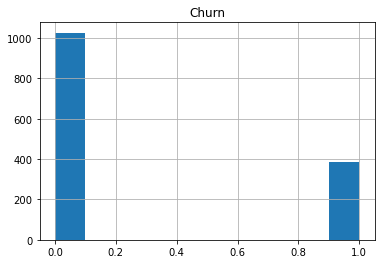

In [32]:
churn_ratio_test = ((y_test_df == 1).sum())/((y_test_df == 0).sum()+(y_test_df == 1).sum())
y_test_df.hist();
print(churn_ratio_test)

# XGBoost - converting to categorical data.

In [33]:
import xgboost as xgb

In [34]:
xgb_clf = xgb.XGBClassifier(random_state=0)

### Customer ID can be dropped as it is not a predictor of churn and simply a way for the company to keep track of its customers.

Other features that are probably not good predictors of churn are:

Partner, PaperlessBilling, PaymentMethod, Dependents since they are not linked to the quality of the service that is being provided. But in the example below, only customerID is dropped.

In [35]:
X_test = X_test.drop(columns=['customerID'])

In [36]:
X_train = X_train.drop(columns=['customerID'])

### Converting the train and test data values to categories. Total charges, monthly charges and tenure are kept as numerical values

In [37]:
X_train.dtypes

train_columns = X_train.columns
non_categorical = ["TotalCharges","MonthlyCharges","tenure"]
train_columns=train_columns.drop(non_categorical)

for column in train_columns:
    X_train[column] = X_train[column].astype('category')
X_train["TotalCharges"] = X_train["TotalCharges"].astype('float64')




In [38]:
X_test.dtypes

test_columns = X_test.columns
non_categorical = ["TotalCharges","MonthlyCharges","tenure"]
test_columns=test_columns.drop(non_categorical)

for column in train_columns:
    X_test[column] = X_test[column].astype('category')
X_test["TotalCharges"] = X_test["TotalCharges"].astype('float64')


In [39]:
m_Xd_train = xgb.DMatrix(data = X_train,label = y_train, enable_categorical = "True")

In [40]:
m_Xd_test = xgb.DMatrix(data = X_test,label = y_test, enable_categorical = "True")

In [41]:
bst_clf = xgb.train(params = {'max_depth':10,'objective':'multi:softmax', 'num_class':3},dtrain = m_Xd_train)

[11:40:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
predictions = bst_clf.predict(m_Xd_test)

In [43]:
accuracy_score(y_test, predictions)

0.7899219304471257

## Feature importance:



In [44]:
from operator import itemgetter
feature_score = bst_clf.get_fscore()
print(feature_score)

feature_list = list(feature_score.items())

sorted_list = sorted(feature_list, key=itemgetter(1), reverse = True)
headers = []
values = []
for i in range(len(sorted_list)):
    headers.append(sorted_list[i][0])
    values.append(sorted_list[i][1])
test_df = pd.DataFrame( columns = [headers])
test_df.loc[0] = values
t_df = test_df.transpose()
t_df.columns = ['Feature Importance']
t_df

{'gender': 200.0, 'SeniorCitizen': 123.0, 'Partner': 157.0, 'Dependents': 122.0, 'tenure': 774.0, 'PhoneService': 24.0, 'MultipleLines': 134.0, 'InternetService': 35.0, 'OnlineSecurity': 80.0, 'OnlineBackup': 145.0, 'DeviceProtection': 104.0, 'TechSupport': 77.0, 'StreamingTV': 81.0, 'StreamingMovies': 75.0, 'Contract': 57.0, 'PaperlessBilling': 148.0, 'PaymentMethod': 263.0, 'MonthlyCharges': 1381.0, 'TotalCharges': 1113.0}


,Feature Importance
MonthlyCharges,1381.0
TotalCharges,1113.0
tenure,774.0
PaymentMethod,263.0
gender,200.0
Partner,157.0
PaperlessBilling,148.0
OnlineBackup,145.0
MultipleLines,134.0
SeniorCitizen,123.0


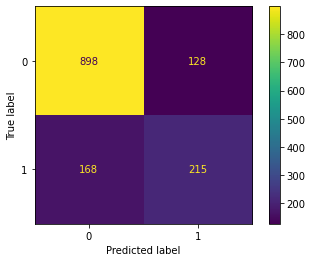

In [45]:
cm_xgb = confusion_matrix(y_test,predictions)

cm_display = ConfusionMatrixDisplay(cm_xgb)
cm_display.plot();

In [161]:
churn_correct = 215/(168+215)
non_churn_correct = 898/(128+898)
print(f"Correctly estimated churn predictions: {churn_correct:.3f}")
print(f"Correctly estimated non-churn predictions: {non_churn_correct:.3f}")

Correctly estimated churn predictions: 0.561
Correctly estimated non-churn predictions: 0.875


The model has difficulties in prediciting churn, only getting slightly more than half of the predictions right. This is problematic as it is the value of most interest for the company

# Using the DMatrix and xgb.train method results in the best accuracy with default values compared to the other methods and is explored further.

This does not imporve the prediction of churn but it does improve the overall accuracy

In [265]:
X_train_modified = X_train.copy()
X_test_modified = X_test.copy()

# Dropping least important feature, PhoneService

In [266]:
X_train_modified = X_train_modified.drop(columns = ['PhoneService'])

In [267]:
X_test_modified = X_test_modified.drop(columns = ['PhoneService'])

In [268]:
m_Xd_train_mod = xgb.DMatrix(data = X_train_modified,label = y_train, enable_categorical = "True")

In [269]:
m_Xd_test_mod = xgb.DMatrix(data = X_test_modified,label = y_test, enable_categorical = "True")

## By setting the learning_rate to 0.2 the overall accuracy is increased

In [310]:
bst_clf_mod = xgb.train(params = {'max_depth':10,'objective':'multi:softmax', 'num_class':3, 'learning_rate':0.2}, dtrain = m_Xd_train_mod)

[14:33:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [311]:
predictions = bst_clf_mod.predict(m_Xd_test_mod)

In [312]:
accuracy_score(y_test, predictions)

0.7998580553584103

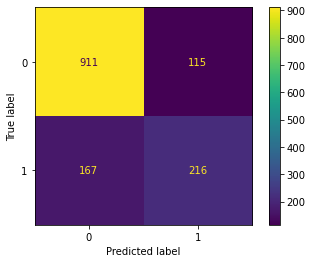

In [293]:
cm_xgb = confusion_matrix(y_test,predictions)

cm_display = ConfusionMatrixDisplay(cm_xgb)
cm_display.plot();

In [55]:
feature_score = bst_clf_mod.get_fscore()
print(feature_score)

feature_list = list(feature_score.items())

sorted_list = sorted(feature_list, key=itemgetter(1), reverse = True)
headers = []
values = []
for i in range(len(sorted_list)):
    headers.append(sorted_list[i][0])
    values.append(sorted_list[i][1])
test_df = pd.DataFrame( columns = [headers])
test_df.loc[0] = values
t_df = test_df.transpose()
t_df.columns = ['Feature Importance']
t_df

{'gender': 199.0, 'SeniorCitizen': 117.0, 'Partner': 152.0, 'Dependents': 112.0, 'tenure': 718.0, 'MultipleLines': 123.0, 'InternetService': 40.0, 'OnlineSecurity': 79.0, 'OnlineBackup': 130.0, 'DeviceProtection': 102.0, 'TechSupport': 63.0, 'StreamingTV': 86.0, 'StreamingMovies': 78.0, 'Contract': 56.0, 'PaperlessBilling': 157.0, 'PaymentMethod': 276.0, 'MonthlyCharges': 1385.0, 'TotalCharges': 1090.0}


,Feature Importance
MonthlyCharges,1385.0
TotalCharges,1090.0
tenure,718.0
PaymentMethod,276.0
gender,199.0
PaperlessBilling,157.0
Partner,152.0
OnlineBackup,130.0
MultipleLines,123.0
SeniorCitizen,117.0


# Dropping the 3x worst, PhoneService, contract and internetservice results in a worse score.

In [246]:
X_train_3xWorst = X_train.copy()
X_test_3xWorst = X_test.copy()

In [247]:
X_train_3xWorst = X_train_3xWorst.drop(columns = ['PhoneService','Contract','InternetService'])

In [248]:
X_test_3xWorst = X_test_3xWorst.drop(columns = ['PhoneService','Contract','InternetService'])

In [249]:
m_Xd_train_3xWorst = xgb.DMatrix(data = X_train_3xWorst,label = y_train, enable_categorical = "True")

In [250]:
m_Xd_test_3xWorst = xgb.DMatrix(data = X_test_3xWorst,label = y_test, enable_categorical = "True")

In [261]:
bst_clf_3xWorst = xgb.train(params = {'max_depth':10,'objective':'multi:softmax', 'num_class':3, 'max_depth':20, 'learning_rate':0.2}, dtrain = m_Xd_train_3xWorst)

[13:11:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [262]:
predictions_3xWorst = bst_clf_3xWorst.predict(m_Xd_test_3xWorst)

In [263]:
accuracy_score(y_test, predictions_3xWorst)

0.7785663591199432

# Dropping the previously mentioned attributes: Partner, PaperlessBilling, PaymentMethod, Dependents

This results in a worse score than just dropping the PhoneService

In [198]:
X_train_dropped = X_train.copy()
X_test_dropped = X_test.copy()

In [199]:
X_test_dropped = X_test_dropped.drop(columns = ['Partner', 'PaperlessBilling', 'PaymentMethod', 'Dependents'])

In [200]:
X_train_dropped = X_train_dropped.drop(columns = ['Partner', 'PaperlessBilling', 'PaymentMethod', 'Dependents'])

In [204]:
m_Xd_train_dropped = xgb.DMatrix(data = X_train_dropped,label = y_train, enable_categorical = "True")

In [205]:
m_Xd_test_dropped = xgb.DMatrix(data = X_test_dropped,label = y_test, enable_categorical = "True")

In [206]:
bst_clf_dropped = xgb.train(params = {'max_depth':10,'objective':'multi:softmax', 'num_class':3}, dtrain = m_Xd_train_dropped)

[13:03:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [212]:
predictions_dropped = bst_clf_dropped.predict(m_Xd_test_dropped)

In [211]:
accuracy_score(y_test, predictions)

0.7835344215755855

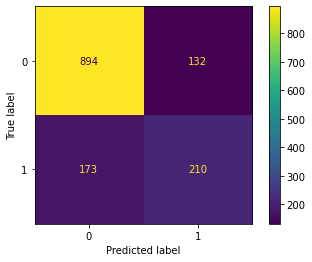

In [224]:
cm_xgb = confusion_matrix(y_test,predictions_dropped)

cm_display = ConfusionMatrixDisplay(cm_xgb)
cm_display.plot();

# Testing with the 3x most important features:

In [192]:
X_train_important = X_train.copy()
X_test_important = X_test.copy()

In [193]:
X_train_3_important = X_train_important[["MonthlyCharges","TotalCharges","tenure"]].copy()
X_test_3_important = X_test_important[["MonthlyCharges","TotalCharges","tenure"]].copy()

In [194]:
m_Xd_train_3_important = xgb.DMatrix(data = X_train_3_important,label = y_train, enable_categorical = "True")

In [195]:
m_Xd_test_3_important = xgb.DMatrix(data = X_test_3_important,label = y_test, enable_categorical = "True")

In [196]:
bst_clf_3_importan = xgb.train(params = {'max_depth':10,'objective':'multi:softmax', 'num_class':3}, dtrain = m_Xd_train_3_important)

[13:01:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [197]:
predictions = bst_clf_3_importan.predict(m_Xd_test_3_important)

## Results in a worse score...

In [62]:
accuracy_score(y_test, predictions)

0.772888573456352

In [63]:
feature_score_3 = bst_clf_3_importan.get_fscore()
print(feature_score_3)

feature_list_3 = list(feature_score_3.items())

sorted_list = sorted(feature_list_3, key=itemgetter(1), reverse = True)
headers = []
values = []
for i in range(len(sorted_list)):
    headers.append(sorted_list[i][0])
    values.append(sorted_list[i][1])
test_df = pd.DataFrame( columns = [headers])
test_df.loc[0] = values
t_df = test_df.transpose()
t_df.columns = ['Feature Importance']
t_df

{'MonthlyCharges': 1811.0, 'TotalCharges': 1743.0, 'tenure': 421.0}


,Feature Importance
MonthlyCharges,1811.0
TotalCharges,1743.0
tenure,421.0


# SCI-Kit learn method.

Cannot used categories as inputs for this method

In [64]:
df_test = pd.read_csv('../../Datasets/churn_test.csv')
df_train = pd.read_csv('../../Datasets/churn_train.csv')

In [65]:
X_test_SC = df_test.drop(columns = ['Churn'])
X_train_SC = df_train.drop(columns = ['Churn'])


y_test_SC = df_test['Churn']
y_train_SC = df_train['Churn']
y_train_SC

0       Yes
1        No
2        No
3        No
4        No
       ... 
5629     No
5630     No
5631     No
5632    Yes
5633     No
Name: Churn, Length: 5634, dtype: object

In [66]:
le_SC = LabelEncoder()

## Giving labels to output

In [67]:
y_test_SC_LE = le_SC.fit_transform(y_test_SC)
y_train_SC_LE = le_SC.fit_transform(y_train_SC)

## Labeling and cleaning data

CustomerID can be dropped. Object values are converted to labeled data.

In [68]:
X_test_SC.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [69]:
X_test_SC = X_test_SC.drop(columns = ['customerID'])

In [70]:
X_train_SC = X_train_SC.drop(columns = ['customerID'])

In [71]:
X_columns = list(X_test_SC)
X_test_SC_LE = X_test_SC.copy()

for i in X_columns:
    X_test_SC_LE[i] = le_SC.fit_transform(X_test_SC[i])
X_test_SC_LE

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,1,3,0,1,0,0,2,0,0,0,2,0,0,3,131,1347
1,1,0,0,0,42,1,2,1,0,2,0,0,2,2,0,1,2,696,761
2,1,0,1,1,43,1,2,1,0,0,2,2,2,2,1,1,1,718,794
3,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,3,366,1160
4,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,143,722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,0,0,0,25,1,0,1,2,0,2,2,2,2,0,1,2,735,501
1405,0,0,1,1,45,0,1,0,2,0,0,0,2,2,0,1,0,208,421
1406,1,0,0,0,10,1,0,0,0,0,0,0,0,0,0,1,2,159,720
1407,1,0,1,1,38,1,2,0,0,2,2,0,2,2,1,0,1,439,524


In [72]:
X_columns = list(X_train_SC)
X_train_SC_LE = X_train_SC.copy()

for i in X_columns:
    X_train_SC_LE[i] = le_SC.fit_transform(X_train_SC[i])
X_train_SC_LE

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,93,1736
1,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,1,29,5213
2,0,1,1,0,60,1,2,1,2,2,2,2,2,2,2,1,0,1477,4416
3,0,0,0,0,5,1,0,2,1,1,1,1,1,1,0,1,3,38,67
4,1,0,1,1,45,1,2,1,0,2,2,0,0,2,1,1,1,1125,3002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,1,1,72,0,1,0,0,2,2,2,2,2,2,1,2,508,2939
5630,0,0,0,0,8,1,0,2,1,1,1,1,1,1,2,0,3,45,843
5631,0,0,1,1,46,1,0,2,1,1,1,1,1,1,2,1,3,27,5159
5632,0,0,0,0,37,1,0,0,0,0,0,0,2,2,0,1,2,579,1596


In [73]:
xgb_SC = xgb.XGBClassifier()

In [74]:
xgb_SC.fit(X_train_SC_LE, y_train_SC_LE)

C:\Users\Axl_w\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:43:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred_LE = xgb_SC.predict(X_test_SC_LE)

accuracy_score(y_test_SC_LE, y_pred_LE)

0.7693399574166075

## Onehot Encoder

In [76]:
from sklearn.preprocessing import OneHotEncoder

## Preparing the OHE

In [77]:
sc_OHE = OneHotEncoder()

In [78]:
df_test = pd.read_csv('../../Datasets/churn_test.csv')
df_train = pd.read_csv('../../Datasets/churn_train.csv')

In [79]:
X_test_OHE = df_test.drop(columns = ['Churn'])
X_train_OHE = df_train.drop(columns = ['Churn'])


y_test_OHE = df_test['Churn']
y_train_OHE = df_train['Churn']
y_train_OHE

0       Yes
1        No
2        No
3        No
4        No
       ... 
5629     No
5630     No
5631     No
5632    Yes
5633     No
Name: Churn, Length: 5634, dtype: object

In [80]:
le_OHE = LabelEncoder()

## Label encoding target values

In [81]:
y_test_SC_OHE = le_OHE.fit_transform(y_test_OHE)
y_train_SC_OHE = le_OHE.fit_transform(y_train_OHE)

In [82]:
X_test_OHE.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

## Removing customerID

In [83]:
X_test_OHE = X_test_OHE.drop(columns = ['customerID'])

In [84]:
X_train_OHE = X_train_OHE.drop(columns = ['customerID'])

## Getting the features to be used in the OHE

Totalcharges, monthly charges and tenure are all numerical data and not categorical and does not need to be encoded with OHE

In [85]:
X_train_OHE_features = X_train_OHE.columns

features_list_OHE = X_train_OHE_features.drop(["TotalCharges","MonthlyCharges","tenure"])


## X_train_OHE_mod is the original dataset without the numerical values

In [86]:
X_train_OHE_mod = X_train_OHE.drop(columns=["TotalCharges","MonthlyCharges","tenure"])

In [87]:
X_test_OHE_mod = X_test_OHE.drop(columns=["TotalCharges","MonthlyCharges","tenure"])

## Creating the new dataframe with OHE.
Feature_list_OHE are all the features that have categorical values and these are split into a column for each different output value

In [88]:
train_OHE_df = pd.DataFrame(sc_OHE.fit_transform(X_train_OHE_mod).toarray())

#Adding feature names to the columns
train_OHE_df.columns = sc_OHE.get_feature_names()

#Readding the previously dropped integer based columns
train_OHE_df = train_OHE_df.join(X_train_OHE["TotalCharges"])
train_OHE_df = train_OHE_df.join(X_train_OHE["MonthlyCharges"])
train_OHE_df = train_OHE_df.join(X_train_OHE["tenure"])
train_OHE_df

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges,tenure
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,25.2,25.20,1
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,95.55,20.05,5
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,6925.9,116.05,60
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,104.3,20.50,5
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4368.85,95.00,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4264,60.00,72
5630,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,161.65,20.85,8
5631,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,927.1,19.95,46
5632,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2345.2,64.75,37


In [108]:
test_OHE_df = pd.DataFrame(sc_OHE.fit_transform(X_test_OHE_mod).toarray())
test_OHE_df.columns = sc_OHE.get_feature_names()

test_OHE_df = test_OHE_df.join(X_test_OHE["TotalCharges"])
test_OHE_df = test_OHE_df.join(X_test_OHE["MonthlyCharges"])
test_OHE_df = test_OHE_df.join(X_test_OHE["tenure"])

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,...,x13_Two year,x14_No,x14_Yes,x15_Bank transfer (automatic),x15_Credit card (automatic),x15_Electronic check,x15_Mailed check,TotalCharges,MonthlyCharges,tenure
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,92.5,40.30,3
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4273.45,101.75,42
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4451.85,104.30,43
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,70.6,70.60,1
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,403.35,44.20,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2686.05,105.50,25
1405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2333.85,50.90,45
1406,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,402.6,45.55,10
1407,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2862.55,78.95,38


In [148]:
xgb_SC_OHE = xgb.XGBClassifier(learning_rate=0.3, max_depth=30)

In [91]:
missing_values_OHE = train_OHE_df[train_OHE_df['TotalCharges'] == train_OHE_df['TotalCharges'].min()].index

In [92]:
missing_values_OHE

Int64Index([1832, 2121, 2347, 2651, 2703, 3294, 3999, 5162], dtype='int64')

In [93]:
for i in missing_values_OHE:
    train_OHE_df.loc[i,('TotalCharges')] = -1


In [110]:
missing_values_OHE_test = test_OHE_df[test_OHE_df['TotalCharges'] == test_OHE_df['TotalCharges'].min()].index

In [111]:
missing_values_OHE_test

Int64Index([765, 910, 1190], dtype='int64')

In [112]:
for i in missing_values_OHE_test:
    test_OHE_df.loc[i,('TotalCharges')] = -1

In [94]:
train_OHE_df['TotalCharges'] = train_OHE_df['TotalCharges'].astype('float64')

In [95]:
train_OHE_df.shape

(5634, 46)

In [145]:
xgb_SC_OHE.fit(train_OHE_df, y_train_SC_OHE)

C:\Users\Axl_w\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=200, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
y_pred_OHE = xgb_SC_OHE.predict(test_OHE_df)

accuracy_score(y_test_SC_OHE, y_pred_OHE)

0.7629524485450674

## The feature_importances_ shows that there are many features in the boosted  trees that do not affect the performance of the algorithm

In [147]:
xgb_SC_OHE.feature_importances_

array([0.00516268, 0.        , 0.00822201, 0.        , 0.00658478,
       0.        , 0.00636866, 0.        , 0.00687463, 0.        ,
       0.00551477, 0.        , 0.00484058, 0.00528393, 0.48366752,
       0.0070163 , 0.01617598, 0.        , 0.00283699, 0.00786995,
       0.        , 0.00354758, 0.00654213, 0.        , 0.00298811,
       0.01276568, 0.        , 0.00331088, 0.00713244, 0.        ,
       0.00777053, 0.00570062, 0.        , 0.02362685, 0.28368664,
       0.00969321, 0.01494194, 0.00579824, 0.        , 0.00675254,
       0.0060888 , 0.00649185, 0.00503136, 0.00548229, 0.00563603,
       0.01059346], dtype=float32)

## Converting the data by using OHE gives a slightly better performance than just label encoding.

Increasing the number of levels in the trees (max_depth) to 30 reduces the accuracy of the model most likely because it becomes to well fitted to the training data. 

Reducing the learning rate increases the score to 0.79 at a learning rate of 0.1 from about 0.78 when the learning rate is set to 0.3